In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [12]:
DATA_FILES_DIR = './data/'
OUTPUT_CHARTS_DIR = './charts/'

if not os.path.exists(DATA_FILES_DIR):
    print(f'ERROR: cannot find dir {DATA_FILES_DIR}')
if not os.path.exists(OUTPUT_CHARTS_DIR):
    os.makedirs(OUTPUT_CHARTS_DIR)

# COVID-19 statistics in Italy

In [27]:
italy_region_data_cols = ['data', 'denominazione_regione', 'totale_ospedalizzati', 'totale_casi', 'deceduti', 'tamponi']      

italy_region = pd.read_csv(f"{DATA_FILES_DIR}dpc-covid19-ita-regioni.csv", usecols=italy_region_data_cols)
italy_region = italy_region.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_ospedalizzati': 'TotalHospitalizedPatients',
                                            'totale_casi': 'TotalPositiveCases', 'deceduti': 'Deaths', 
                                            'tamponi': 'TestsPerformed'})
italy_region['Date']= pd.to_datetime(italy_region['Date'])

In [28]:
first_date = italy_region['Date'].min()
last_date = italy_region['Date'].max()
print(f"Dates: {first_date} - {last_date}")
print(f'{italy_region.shape} samples, attributes')
italy_region.describe().T

Dates: 2020-02-24 18:00:00 - 2020-03-13 17:00:00
(399, 6) samples, attributes


,count,mean,std,min,25%,50%,75%,max
TotalHospitalizedPatients,399.0,132.982456,534.860591,0.0,1.0,7.0,41.5,5085.0
Deaths,399.0,13.822055,74.724996,0.0,0.0,0.0,2.0,890.0
TotalPositiveCases,399.0,248.736842,935.835997,0.0,2.0,16.0,104.0,9820.0
TestsPerformed,399.0,1756.964912,4422.176722,0.0,39.0,238.0,1025.0,32700.0


In [44]:
from IPython.display import Markdown
Markdown("""
# Last Updated: {last_date}
""".format(last_date=last_date))


# Last Updated: 2020-03-13 17:00:00


In [45]:
# RegionName is irrelevant for the max statistics
italy_region[filter(lambda col : col != 'RegionName', italy_region.columns)].max()

Date                         2020-03-13 17:00:00
TotalHospitalizedPatients                   5085
Deaths                                       890
TotalPositiveCases                          9820
TestsPerformed                             32700
dtype: object

In [31]:
%timeit italy_region['RegionName'].nunique()
%timeit set(italy_region['RegionName'].values) # 10x faster!

130 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
9.04 µs ± 93.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at last_date). 

In [33]:
# this is the order that we want for the stat TotalPositiveCases
italy_region[italy_region['Date']==last_date].sort_values(by='TotalPositiveCases', ascending=False)['RegionName']

387                Lombardia
383           Emilia Romagna
398                   Veneto
390                 Piemonte
388                   Marche
394                  Toscana
386                  Liguria
385                    Lazio
384    Friuli Venezia Giulia
382                 Campania
395              P.A. Trento
393                  Sicilia
391                   Puglia
380             P.A. Bolzano
378                  Abruzzo
396                   Umbria
392                 Sardegna
381                 Calabria
397            Valle d'Aosta
389                   Molise
379               Basilicata
Name: RegionName, dtype: object

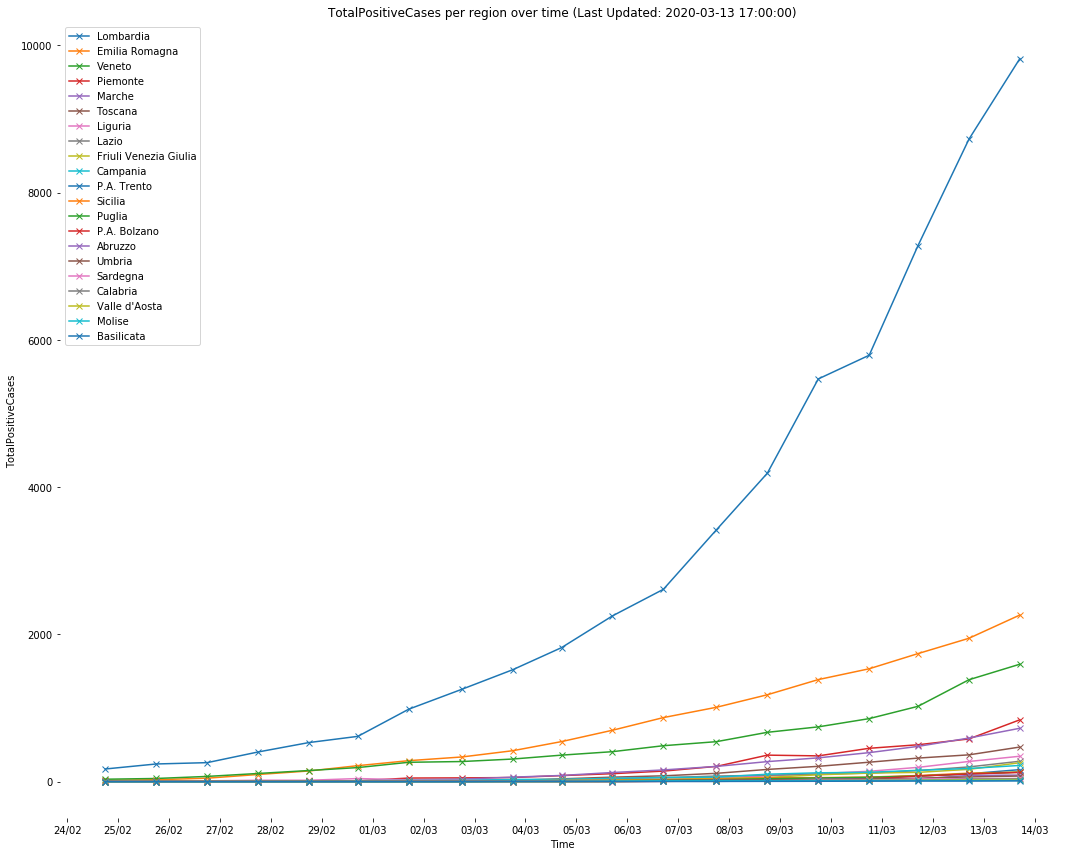

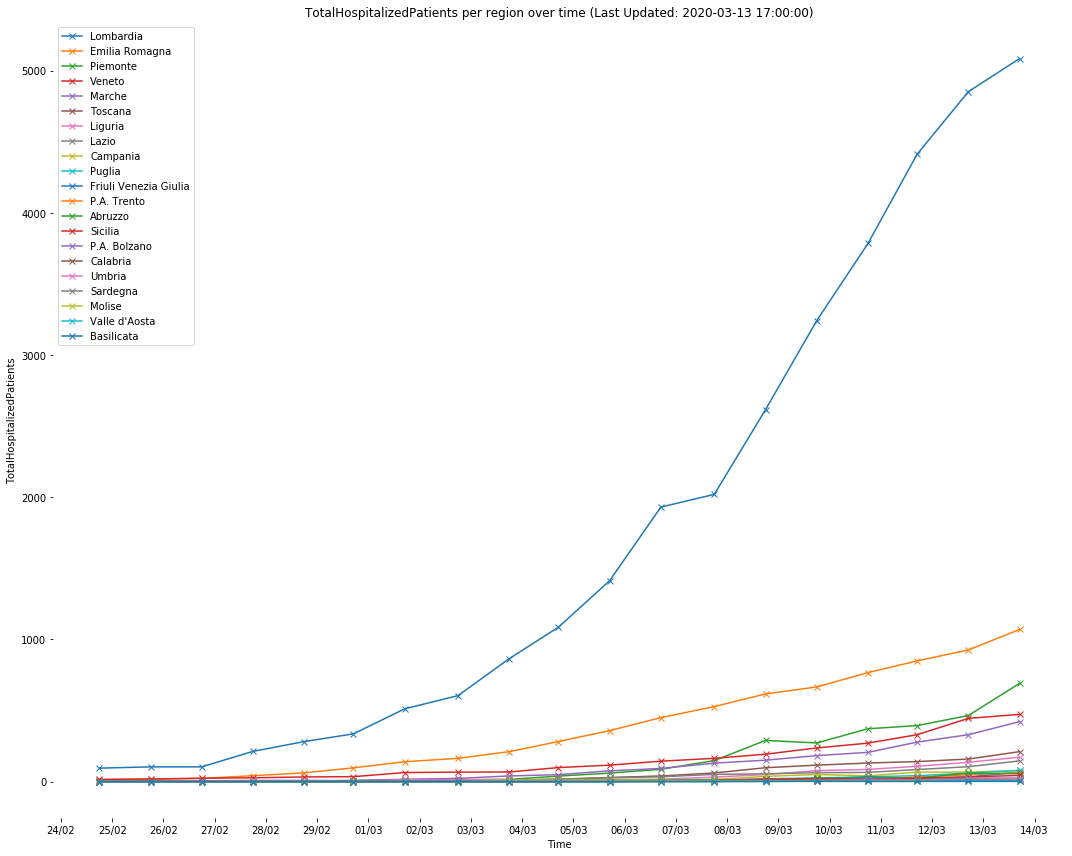

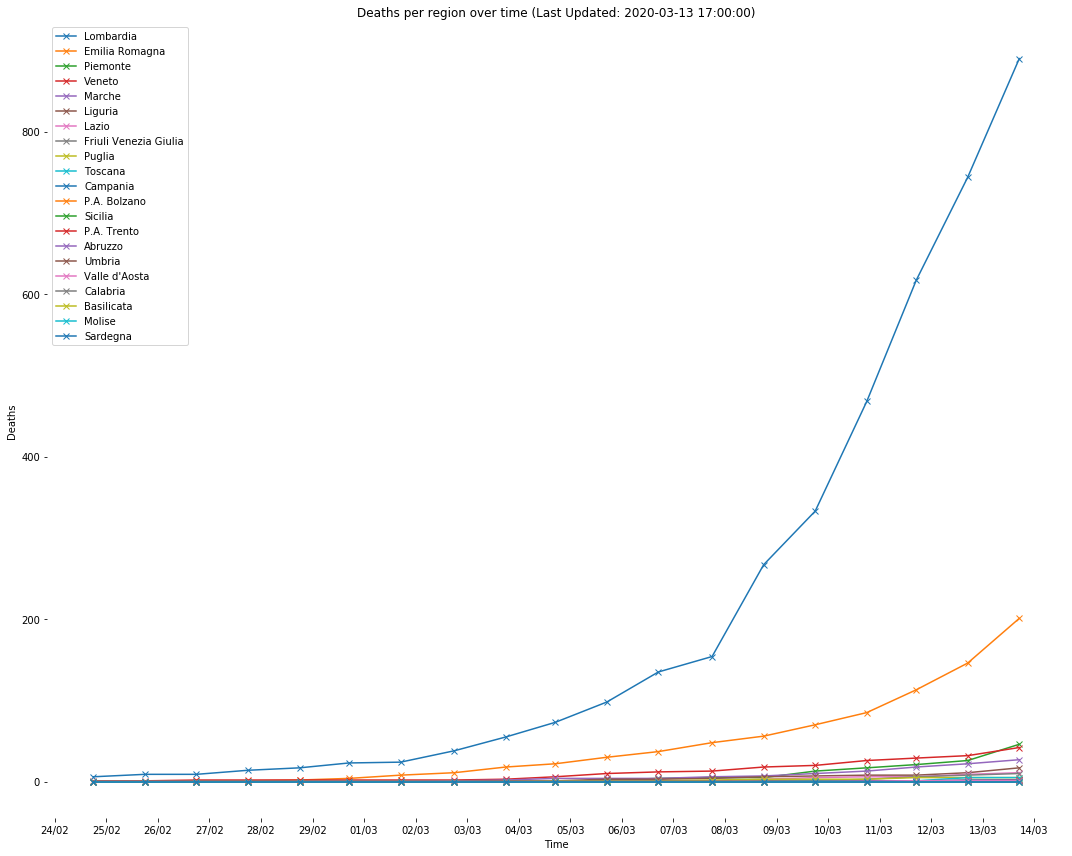

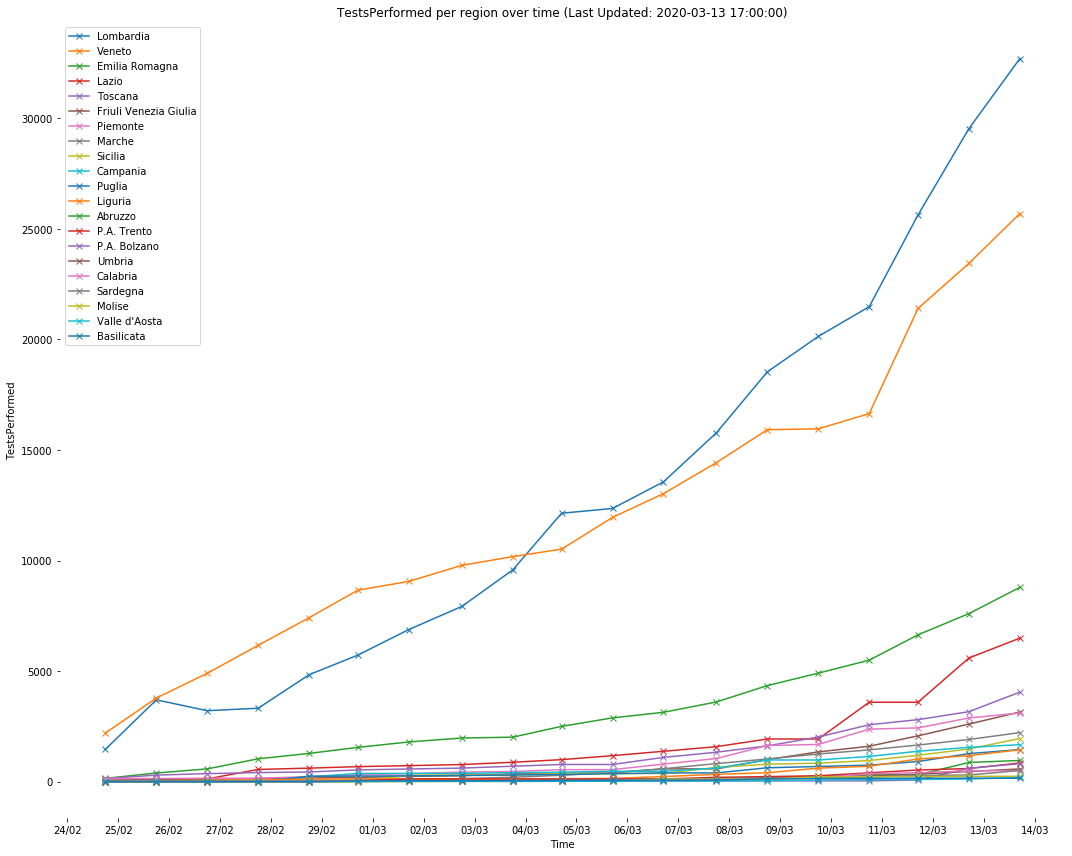

In [34]:
for stat in ['TotalPositiveCases', 'TotalHospitalizedPatients', 'Deaths', 'TestsPerformed']:
    plt.figure(figsize=(15, 12))
    for region in italy_region[italy_region['Date']==last_date].sort_values(by=stat, ascending=False)['RegionName']:
        plt.plot(italy_region[italy_region['RegionName'] == region]['Date'], 
                 italy_region[italy_region['RegionName'] == region][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per region over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    import matplotlib.dates as mdates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}ita_region_{stat}.png', dpi=300)

In [36]:
italy_region_cluster_cols = ['data', 'denominazione_regione', 'totale_casi', 'lat', 'long']     

italy_region_cluster = pd.read_csv(f"{DATA_FILES_DIR}dpc-covid19-ita-regioni.csv", usecols=italy_region_cluster_cols)
italy_region_cluster = italy_region_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName', 
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_region_cluster['Date'] = pd.to_datetime(italy_region_cluster['Date'])
italy_region_cluster = italy_region_cluster[italy_region_cluster['Date']==last_date]
italy_region_cluster

,Date,RegionName,Latitude,Longitude,TotalPositiveCases
378,2020-03-13 17:00:00,Abruzzo,42.351222,13.398438,89
379,2020-03-13 17:00:00,Basilicata,40.639471,15.805148,10
380,2020-03-13 17:00:00,P.A. Bolzano,46.499335,11.356624,125
381,2020-03-13 17:00:00,Calabria,38.905976,16.594402,38
382,2020-03-13 17:00:00,Campania,40.839566,14.250850,220
383,2020-03-13 17:00:00,Emilia Romagna,44.494367,11.341721,2263
384,2020-03-13 17:00:00,Friuli Venezia Giulia,45.649435,13.768136,257
385,2020-03-13 17:00:00,Lazio,41.892770,12.483667,277
386,2020-03-13 17:00:00,Liguria,44.411493,8.932699,345
387,2020-03-13 17:00:00,Lombardia,45.466794,9.190347,9820


In [37]:
import folium
# may require pip install folium
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, lat, lon, count in zip(italy_region_cluster['RegionName'], italy_region_cluster['Latitude'], 
                                   italy_region_cluster['Longitude'], italy_region_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/200,
                        color='red',
                        popup=f'RegionName: {region}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map

In [38]:
italy_province_cluster_cols = ['data', 'denominazione_regione', 'denominazione_provincia', 'totale_casi', 'lat', 'long']      

italy_province_cluster = pd.read_csv(f"{DATA_FILES_DIR}dpc-covid19-ita-province.csv", usecols=italy_province_cluster_cols)
italy_province_cluster = italy_province_cluster.rename(columns={'data': 'Date', 'denominazione_regione': 'RegionName',
                                            'denominazione_provincia': 'ProvinceName',
                                            'totale_casi': 'TotalPositiveCases', 
                                            'lat': 'Latitude', 
                                            'long': 'Longitude'})
italy_province_cluster['Date'] = pd.to_datetime(italy_province_cluster['Date'])
italy_province_cluster = italy_province_cluster[(italy_province_cluster['Date']==last_date) & 
                                                 (italy_province_cluster['Latitude']!=0.0) &
                                                 (italy_province_cluster['TotalPositiveCases']!=0.0)]
italy_province_cluster

,Date,RegionName,ProvinceName,Latitude,Longitude,TotalPositiveCases
2304,2020-03-13 17:00:00,Abruzzo,Chieti,42.351032,14.167546,23.0
2305,2020-03-13 17:00:00,Abruzzo,L'Aquila,42.351222,13.398438,9.0
2306,2020-03-13 17:00:00,Abruzzo,Pescara,42.464584,14.213648,48.0
2307,2020-03-13 17:00:00,Abruzzo,Teramo,42.658918,13.704400,9.0
2309,2020-03-13 17:00:00,Basilicata,Matera,40.667512,16.597924,3.0
...,...,...,...,...,...,...
2426,2020-03-13 17:00:00,Veneto,Rovigo,45.071073,11.790070,16.0
2427,2020-03-13 17:00:00,Veneto,Treviso,45.667546,12.245074,327.0
2428,2020-03-13 17:00:00,Veneto,Venezia,45.434905,12.338452,248.0
2429,2020-03-13 17:00:00,Veneto,Verona,45.438390,10.993527,210.0


In [39]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, province, lat, lon, count in zip(italy_province_cluster['RegionName'], 
                                             italy_province_cluster['ProvinceName'],
                                             italy_province_cluster['Latitude'], 
                                             italy_province_cluster['Longitude'], 
                                             italy_province_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/200,
                        color='red',
                        popup=f'RegionName: {region}<br>ProvinceName: {province}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map